In [1]:
import tensorflow as tf
from IPython.display import Image, display

import matplotlib.pyplot as plt
import tensorflow_hub as hub
!pip install tensorflow_hub!pip install tensorflow_hub
import numpy as np

import warnings
warnings.filterwarnings("ignore")

ERROR: Invalid requirement: 'tensorflow_hub!pip'


In [5]:
!wget https://storage.googleapis.com/ibeans/train.zip
!wget https://storage.googleapis.com/ibeans/validation.zip
!wget https://storage.googleapis.com/ibeans/test.zip

--2023-05-05 23:19:10--  https://storage.googleapis.com/ibeans/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:400e:800::2010, 2a00:1450:400e:80c::2010, 2a00:1450:400e:805::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:400e:800::2010|:443... failed: Connection timed out.
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:400e:80c::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143812152 (137M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>] 137,15M  34,5MB/s    in 4,6s    

2023-05-05 23:21:30 (29,6 MB/s) - ‘train.zip’ saved [143812152/143812152]

--2023-05-05 23:21:30--  https://storage.googleapis.com/ibeans/validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:400e:803::2010, 2a00:1450:400e:802::2010, 2a00:1450:400e:80f::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|

In [6]:
mkdir beansb

In [7]:
!unzip train.zip -d beans/
!unzip test.zip -d beans/
!unzip validation -d beans/

Archive:  train.zip
   creating: beans/train/
   creating: beans/train/healthy/
   creating: beans/train/angular_leaf_spot/
   creating: beans/train/bean_rust/
  inflating: beans/train/healthy/healthy_train.265.jpg  
  inflating: beans/train/healthy/healthy_train.271.jpg  
  inflating: beans/train/healthy/healthy_train.259.jpg  
  inflating: beans/train/healthy/healthy_train.99.jpg  
  inflating: beans/train/healthy/healthy_train.311.jpg  
  inflating: beans/train/healthy/healthy_train.66.jpg  
  inflating: beans/train/healthy/healthy_train.72.jpg  
  inflating: beans/train/healthy/healthy_train.305.jpg  
  inflating: beans/train/healthy/healthy_train.339.jpg  
  inflating: beans/train/healthy/healthy_train.113.jpg  
  inflating: beans/train/healthy/healthy_train.107.jpg  
  inflating: beans/train/healthy/healthy_train.106.jpg  
  inflating: beans/train/healthy/healthy_train.112.jpg  
  inflating: beans/train/healthy/healthy_train.338.jpg  
  inflating: beans/train/healthy/healthy_trai

  inflating: beans/train/healthy/healthy_train.36.jpg  
  inflating: beans/train/healthy/healthy_train.22.jpg  
  inflating: beans/train/healthy/healthy_train.180.jpg  
  inflating: beans/train/healthy/healthy_train.194.jpg  
  inflating: beans/train/healthy/healthy_train.143.jpg  
  inflating: beans/train/healthy/healthy_train.157.jpg  
  inflating: beans/train/healthy/healthy_train.156.jpg  
  inflating: beans/train/healthy/healthy_train.142.jpg  
  inflating: beans/train/healthy/healthy_train.195.jpg  
  inflating: beans/train/healthy/healthy_train.181.jpg  
  inflating: beans/train/healthy/healthy_train.23.jpg  
  inflating: beans/train/healthy/healthy_train.340.jpg  
  inflating: beans/train/healthy/healthy_train.37.jpg  
  inflating: beans/train/healthy/healthy_train.220.jpg  
  inflating: beans/train/healthy/healthy_train.234.jpg  
  inflating: beans/train/healthy/healthy_train.208.jpg  
  inflating: beans/train/healthy/healthy_train.222.jpg  
  inflating: beans/train/healthy/he

  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.61.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.75.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.137.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.49.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.321.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.335.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.3.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.309.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.296.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.282.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.255.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.241.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.269.jpg  
  in

  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.204.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.238.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.24.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.166.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.172.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.30.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.18.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.199.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.158.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.164.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.26.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.32.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.170.jpg  
  in

  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.262.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.289.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.8.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.302.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.316.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.128.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.42.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.100.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.114.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.56.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.81.jpg  
  inflating: beans/train/angular_leaf_spot/angular_leaf_spot_train.95.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.212.jpg  
  inflating: beans/tr

  inflating: beans/train/bean_rust/bean_rust_train.260.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.328.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.300.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.314.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.38.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.6.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.102.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.10.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.116.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.11.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.117.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.103.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.7.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.39.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.315.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.301.jpg  
  inflating: beans/train/bean_ru

  inflating: beans/train/bean_rust/bean_rust_train.218.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.344.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.152.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.54.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.40.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.146.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.68.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.191.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.97.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.83.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.185.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.82.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.184.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.190.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.96.jpg  
  inflating: beans/train/bean_rust/bean_rust_train.69.jpg  
  inflating: beans/train/bean_ru

  inflating: beans/test/angular_leaf_spot/angular_leaf_spot_test.0.jpg  
  inflating: beans/test/angular_leaf_spot/angular_leaf_spot_test.24.jpg  
  inflating: beans/test/angular_leaf_spot/angular_leaf_spot_test.30.jpg  
  inflating: beans/test/angular_leaf_spot/angular_leaf_spot_test.18.jpg  
  inflating: beans/test/angular_leaf_spot/angular_leaf_spot_test.19.jpg  
  inflating: beans/test/angular_leaf_spot/angular_leaf_spot_test.31.jpg  
  inflating: beans/test/angular_leaf_spot/angular_leaf_spot_test.25.jpg  
  inflating: beans/test/angular_leaf_spot/angular_leaf_spot_test.1.jpg  
  inflating: beans/test/angular_leaf_spot/angular_leaf_spot_test.28.jpg  
  inflating: beans/test/angular_leaf_spot/angular_leaf_spot_test.14.jpg  
  inflating: beans/test/angular_leaf_spot/angular_leaf_spot_test.15.jpg  
  inflating: beans/test/angular_leaf_spot/angular_leaf_spot_test.29.jpg  
  inflating: beans/test/angular_leaf_spot/angular_leaf_spot_test.17.jpg  
  inflating: beans/test/angular_leaf_spo

  inflating: beans/validation/bean_rust/bean_rust_val.40.jpg  
  inflating: beans/validation/bean_rust/bean_rust_val.41.jpg  
  inflating: beans/validation/bean_rust/bean_rust_val.7.jpg  
  inflating: beans/validation/bean_rust/bean_rust_val.26.jpg  
  inflating: beans/validation/bean_rust/bean_rust_val.32.jpg  
  inflating: beans/validation/bean_rust/bean_rust_val.33.jpg  
  inflating: beans/validation/bean_rust/bean_rust_val.27.jpg  
  inflating: beans/validation/bean_rust/bean_rust_val.6.jpg  
  inflating: beans/validation/bean_rust/bean_rust_val.4.jpg  
  inflating: beans/validation/bean_rust/bean_rust_val.19.jpg  
  inflating: beans/validation/bean_rust/bean_rust_val.31.jpg  
  inflating: beans/validation/bean_rust/bean_rust_val.25.jpg  
  inflating: beans/validation/bean_rust/bean_rust_val.24.jpg  
  inflating: beans/validation/bean_rust/bean_rust_val.30.jpg  
  inflating: beans/validation/bean_rust/bean_rust_val.18.jpg  
  inflating: beans/validation/bean_rust/bean_rust_val.5.jp

In [8]:
!ls beans

test  train  validation


In [9]:
!find beans -type f | wc -l

1296


In [12]:
!find beans/train -type f | wc -l

1035


In [13]:
!find beans/validation -type f | wc -l

133


In [14]:
!find beans/test -type f | wc -l

128


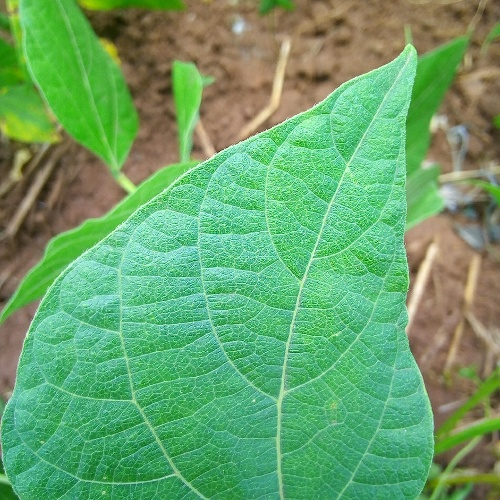

In [2]:
display(Image("beans/train/healthy/healthy_train.0.jpg"))

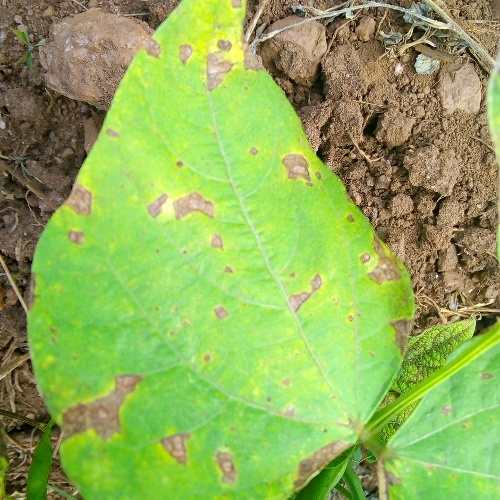

In [3]:
display(Image("beans/train/angular_leaf_spot/angular_leaf_spot_train.124.jpg"))

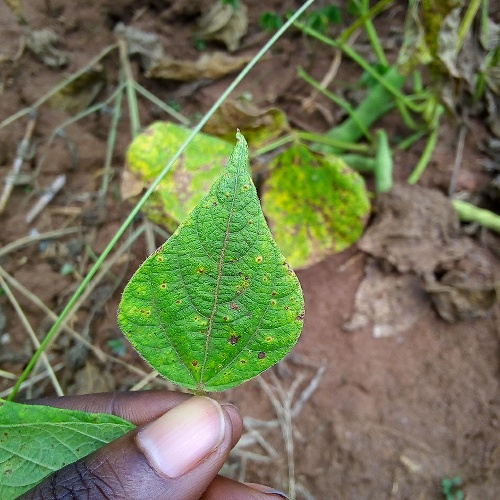

In [4]:
display(Image("beans/train/bean_rust/bean_rust_train.162.jpg"))

In [5]:
batch_size = 128
img_height = 224
img_width = 224

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory("beans/train",
                                                              seed=111,
                                                              image_size=(img_height, img_width),
                                                              batch_size=batch_size)

Found 1034 files belonging to 3 classes.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory("beans/validation",
                                                              seed=111,
                                                              image_size=(img_height, img_width),
                                                              batch_size=batch_size)

Found 133 files belonging to 3 classes.


In [8]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory("beans/test",
                                                              seed=111,
                                                              image_size=(img_height, img_width),
                                                              batch_size=batch_size)

Found 128 files belonging to 3 classes.


In [9]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(128, 224, 224, 3)
(128,)


In [10]:
classes = train_ds.class_names
print(classes)

['angular_leaf_spot', 'bean_rust', 'healthy']


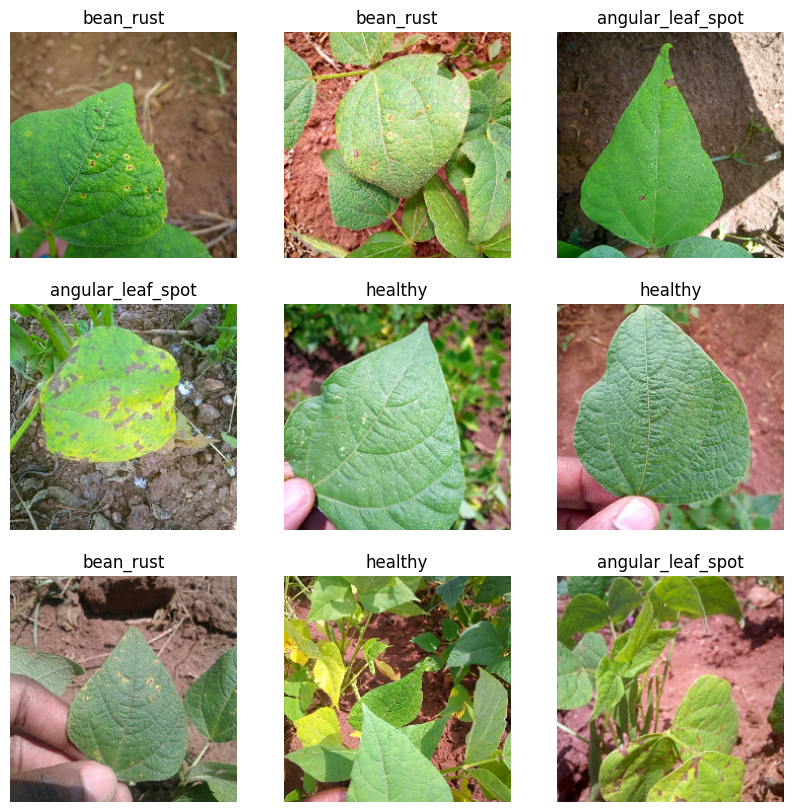

In [11]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])
        plt.axis("off")

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [14]:
feature_extractor_layer = hub.KerasLayer(feature_extractor, input_shape=(img_height, img_width, 3))

In [15]:
feature_extractor_layer.trainable = False

In [16]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [17]:
tf.random.set_seed(111)

In [18]:
model = tf.keras.Sequential([
    normalization_layer,
    feature_extractor_layer,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [37]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [38]:
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20


2023-05-05 23:39:58.513702: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-05-05 23:39:58.514536: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


9/9 [==============================] - 8s 332ms/step - loss: 1.1572 - accuracy: 0.4526 - val_loss: 0.7789 - val_accuracy: 0.6760
Epoch 2/20
9/9 [==============================] - 2s 254ms/step - loss: 0.7867 - accuracy: 0.6451 - val_loss: 0.6028 - val_accuracy: 0.7573
Epoch 3/20
9/9 [==============================] - 2s 244ms/step - loss: 0.6606 - accuracy: 0.7118 - val_loss: 0.5195 - val_accuracy: 0.7950
Epoch 4/20
9/9 [==============================] - 2s 250ms/step - loss: 0.5916 - accuracy: 0.7544 - val_loss: 0.4629 - val_accuracy: 0.8172
Epoch 5/20
9/9 [==============================] - 2s 257ms/step - loss: 0.5019 - accuracy: 0.7892 - val_loss: 0.4200 - val_accuracy: 0.8308
Epoch 6/20
9/9 [==============================] - 2s 254ms/step - loss: 0.4560 - accuracy: 0.8162 - val_loss: 0.3852 - val_accuracy: 0.8530
Epoch 7/20
9/9 [==============================] - 2s 257ms/step - loss: 0.4270 - accuracy: 0.8201 - val_loss: 0.3600 - val_accuracy: 0.8617
Epoch 8/20
9/9 [===============

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


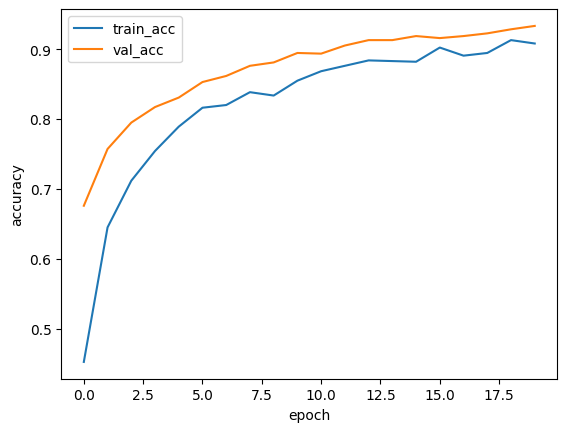

In [40]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_acc", "val_acc"], loc="best")
plt.show()

In [41]:
result = model.evaluate(test_ds)

1/1 [==============================] - 0s 218ms/step - loss: 0.2824 - accuracy: 0.8828


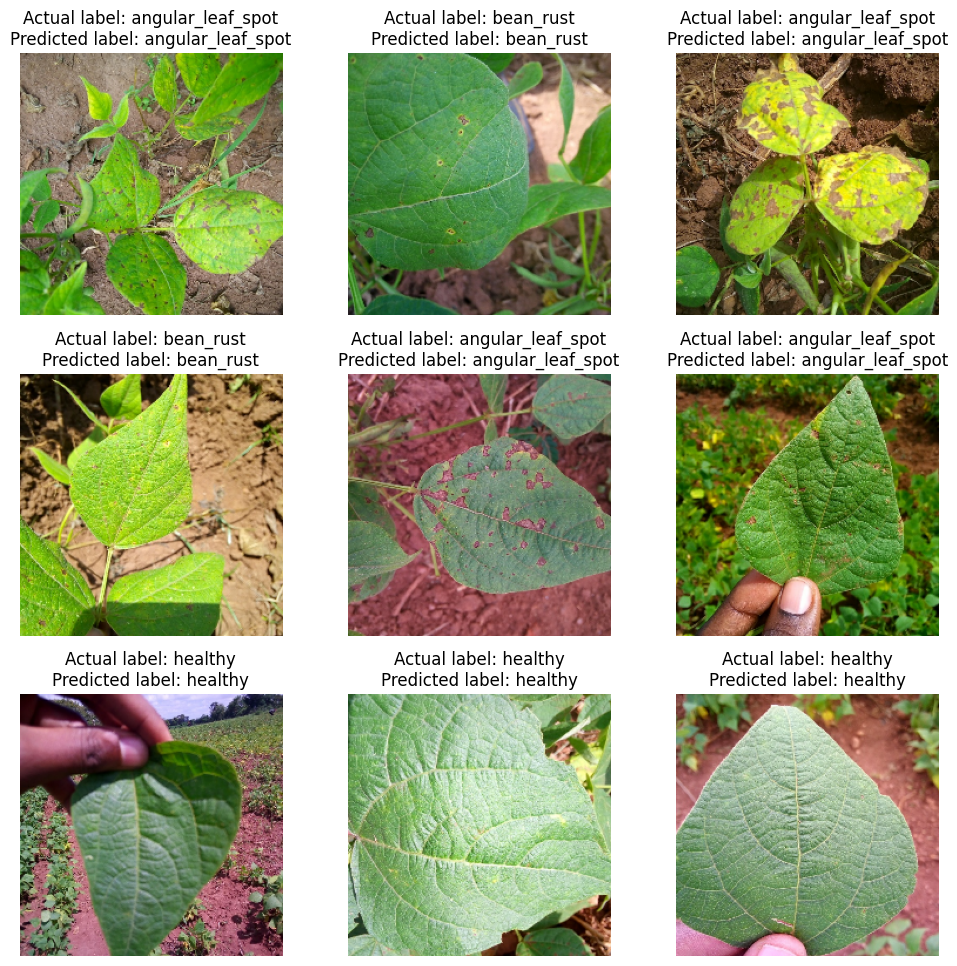

In [44]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

        plt.tight_layout()

        img = tf.keras.preprocessing.image.img_to_array(images[i])
        img = np.expand_dims(img, axis=0)

        pred = model.predict(img)

        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Actual label: {classes[labels[i]]}\nPredicted label: {classes[np.argmax(pred)]}", fontsize=12)
        plt.axis("off")
plt.show()

In [45]:
model.save("./models", save_format="tf")

2023-05-05 23:49:47.093535: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./models/assets


INFO:tensorflow:Assets written to: ./models/assets


In [46]:
!ls models

assets	keras_metadata.pb  saved_model.pb  variables


In [19]:
model_loaded = tf.keras.models.load_model('./models/')

In [20]:
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [21]:
from PIL import Image
import numpy as np
from skimage import transform

def process(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype("float32")
    np_image = transform.resize(np_image, (224,224,3))
    np_image = np.expand_dims(np_image, axis=0)
    
    return np_image

In [26]:
pred_label = model_loaded.predict(process("beans/train/healthy/healthy_train.0.jpg"))
print(classes[np.argmax(pred_label)])

2023-05-06 00:08:32.664871: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-05-06 00:08:32.665508: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


healthy


In [27]:
pred_label

array([[9.1725646e-04, 4.1275773e-02, 9.5780700e-01]], dtype=float32)

In [28]:
!zip -r models.zip models/

  adding: models/ (stored 0%)
  adding: models/keras_metadata.pb (deflated 82%)
  adding: models/assets/ (stored 0%)
  adding: models/saved_model.pb (deflated 91%)
  adding: models/variables/ (stored 0%)
  adding: models/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: models/variables/variables.index (deflated 78%)


In [29]:
print(tf.__version__)

2.8.0
